In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np



In [4]:
dataset=pd.read_csv('haberman.csv')
print(dataset.columns)
print(dataset.shape)
print(dataset['Surv_Status'].value_counts())

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')
(306, 4)
1    225
2     81
Name: Surv_Status, dtype: int64


In [5]:
dataset.head()

,Age,Operation_Year,Axil_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


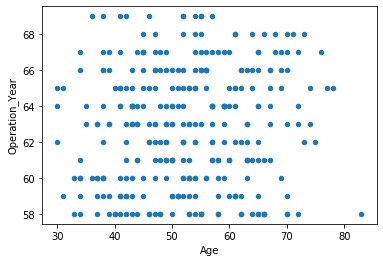

In [6]:
dataset.plot(kind='scatter',x='Age',y='Operation_Year')
plt.show()

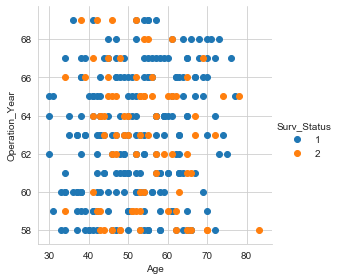

In [7]:
sb.set_style('whitegrid')
sb.FacetGrid(dataset,hue='Surv_Status',height=4)\
.map(plt.scatter,'Age','Operation_Year')\
.add_legend()
plt.show()

PairPlots

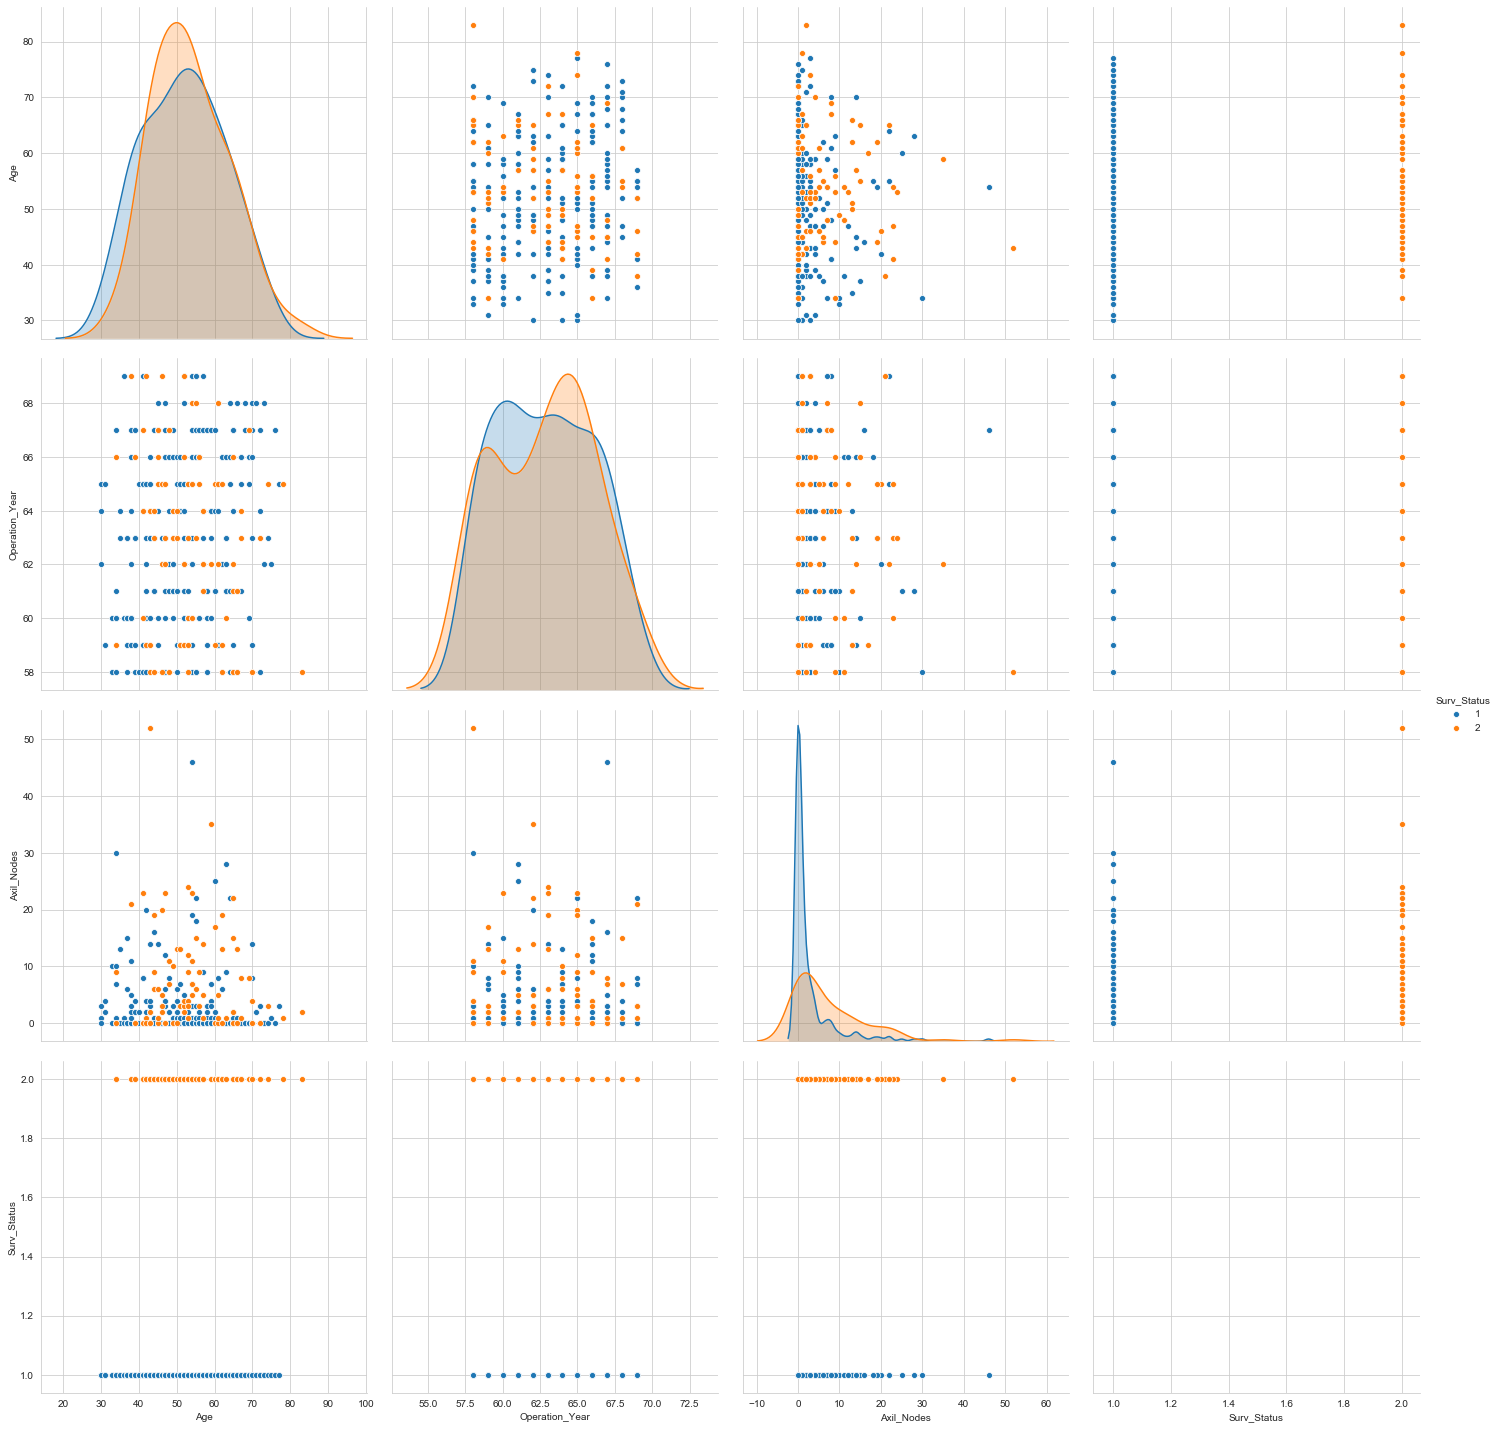

In [9]:
plt.close()
sb.set_style('whitegrid')
sb.pairplot(dataset,hue='Surv_Status',height=5)
plt.show()


As we observe its really difficult to segregate the data by using plots that we draw against Operation Year and Age. But if we observe the Axil Nodes plot we can clearly say that Survival Status is '1' if they have less number of nodes so we are going to perform operations on Axil Nodes

# Note:
Labeling Survival Status 'yes' for the patients who survived 5 years or more and 'no' for the patients who survived less than 5 years

In [8]:
dataset.loc[dataset['Surv_Status']==2,'Surv_Status']='no'
dataset.loc[dataset['Surv_Status']==1,'Surv_Status']='yes'


In [9]:
dataset.tail()

,Age,Operation_Year,Axil_Nodes,Surv_Status
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


# 1-D Scatter Plot
Plotting 1-D scatter by distinguishing data based ion Auxiliary Nodes

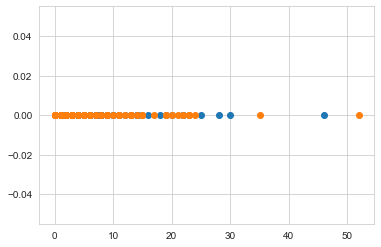

In [10]:
dataset_long_survive=dataset.loc[dataset['Surv_Status']=='yes']
dataset_short_survive=dataset.loc[dataset['Surv_Status']=='no']
plt.plot(dataset_long_survive['Axil_Nodes'],np.zeros_like(dataset_long_survive['Axil_Nodes']),'o')
plt.plot(dataset_short_survive['Axil_Nodes'],np.zeros_like(dataset_short_survive['Axil_Nodes']),'o')
plt.show()

## PDF and CDFs

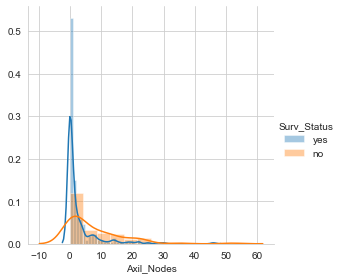

In [61]:
sb.FacetGrid(dataset,hue='Surv_Status',size=4)\
.map(sb.distplot,'Axil_Nodes')\
.add_legend()
plt.show()

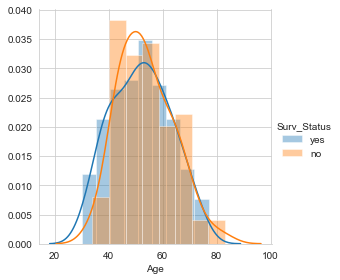

In [60]:
sb.FacetGrid(dataset,hue='Surv_Status',size=4)\
.map(sb.distplot,'Age')\
.add_legend()
plt.show()

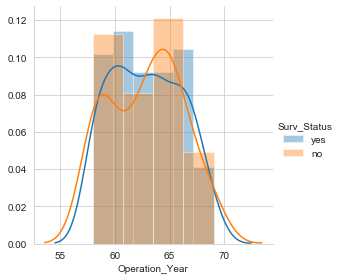

In [59]:
sb.FacetGrid(dataset,hue='Surv_Status',size=4)\
.map(sb.distplot,'Operation_Year')\
.add_legend()
plt.show()

[0.66666667 0.12444444 0.04444444 0.02666667 0.02222222 0.03111111
 0.00888889 0.00888889 0.00444444 0.01777778 0.00444444 0.00444444
 0.00444444 0.00444444 0.00888889 0.         0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00444444]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]
[0.33333333 0.14814815 0.08641975 0.03703704 0.04938272 0.0617284
 0.04938272 0.04938272 0.03703704 0.01234568 0.02469136 0.01234568
 0.02469136 0.04938272 0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.   

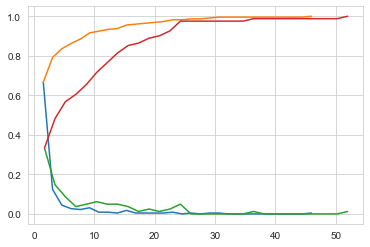

In [103]:
counts,bin_edges=np.histogram(dataset_long_survive['Axil_Nodes'],bins=30,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts,bin_edges=np.histogram(dataset_short_survive['Axil_Nodes'],bins=30,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

In [69]:
print('MEAN')
print(np.mean(dataset_long_survive['Axil_Nodes']))
print(np.mean(dataset_short_survive['Axil_Nodes']))
print('Standard Deviation')
print(np.std(dataset_long_survive['Axil_Nodes']))
print(np.std(dataset_short_survive['Axil_Nodes']))

MEAN
2.7911111111111113
7.45679012345679
Standard Deviation
5.857258449412131
9.128776076761632


In [76]:
print('Median')
print(np.median(dataset_long_survive['Axil_Nodes']))
print(np.median(dataset_short_survive['Axil_Nodes']))
print('Quantiles')
print(np.percentile(dataset_long_survive['Axil_Nodes'],np.arange(0,100,25)))
print(np.percentile(dataset_short_survive['Axil_Nodes'],np.arange(0,100,25)))
print('\n90th percentile')
print(np.percentile(dataset_long_survive['Axil_Nodes'],90))
print(np.percentile(dataset_short_survive['Axil_Nodes'],90))

Median
0.0
4.0
Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile
8.0
20.0


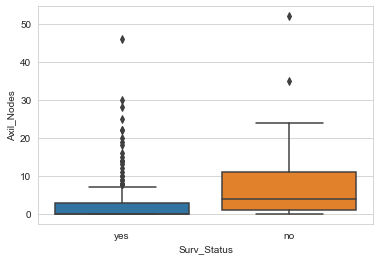

In [84]:
sb.boxplot(x='Surv_Status',y='Axil_Nodes',data= dataset)

plt.show()

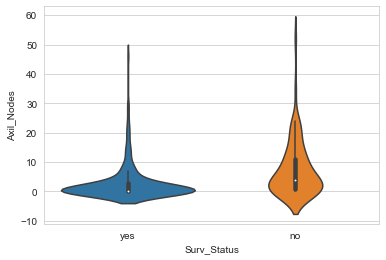

In [88]:
sb.violinplot(x='Surv_Status',y='Axil_Nodes',data= dataset)
plt.legend
plt.show()

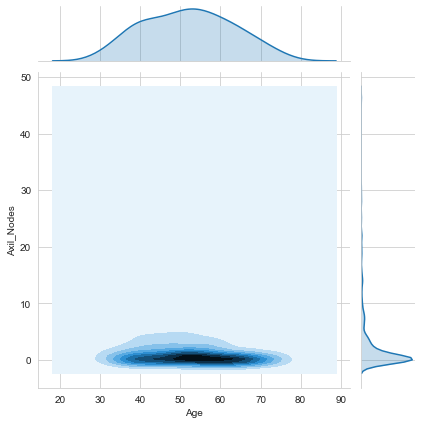

In [99]:
sb.jointplot(x='Age',y='Axil_Nodes',data=dataset_long_survive,kind='kde')
plt.show()